# **Jamboree Education Business Case Study**

## **About Data**


> Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students
achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.
>
> To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique
perspective of Indian applicants.
>
> By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine
an individual's admission chances based on various variables.

## **Objective**

> As a data scientist/ML engineer hired by Jamboree, your primary objective is toanalyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset to construct a predictive model
capable of estimating an applicant's likelihood of admission based on the available features.

> Solving this business case holds immense importance for aspiring data scientists and ML engineers.
>
> Building predictive models using machine learning is widely popular among the data scientists/ML engineers. By working through this case study, individuals gain hands-on experience and practical skills in the field.
>
> Additionally, it will enhance one's ability to communicate with the stakeholders involved in data-related projects and help the organization take better, data-driven decisions.s.

##  **Importing Libraries**

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

In [279]:
Jamboree_data = pd.read_csv('Jamboree_Admission.csv')

In [280]:
Jamboree_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [281]:
copy_Jamboree_data = Jamboree_data.copy()

In [282]:
copy_Jamboree_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## **Exploratory Data Analysis**

In [283]:
#Get basic information about the DataFrame
copy_Jamboree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Drop any irrelevant column present in the dataset

In [284]:
copy_Jamboree_data = copy_Jamboree_data.drop(columns = 'Serial No.')

First column i.e. 'Serial No.' which was observed as unique row identifier which was dropped and was not required for model buildingry.

### Checking the Shape of Dataset

In [285]:
# Finding the number of rows and columns given in the dataset
print(f"Total number of rows in the dataset : {copy_Jamboree_data.shape[0]}\nTotal number of columns in the dataset : {copy_Jamboree_data.shape[1]}")

Total number of rows in the dataset : 500
Total number of columns in the dataset : 8


### Checking the Datatype of each column

In [286]:
copy_Jamboree_data.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


### Checking the range of attributes

In [287]:
for _ in copy_Jamboree_data.columns:
    print()
    print(f'Range of {_} column is from {copy_Jamboree_data[_].min()} to {copy_Jamboree_data[_].max()}')
    print('-'*120)


Range of GRE Score column is from 290 to 340
------------------------------------------------------------------------------------------------------------------------

Range of TOEFL Score column is from 92 to 120
------------------------------------------------------------------------------------------------------------------------

Range of University Rating column is from 1 to 5
------------------------------------------------------------------------------------------------------------------------

Range of SOP column is from 1.0 to 5.0
------------------------------------------------------------------------------------------------------------------------

Range of LOR  column is from 1.0 to 5.0
------------------------------------------------------------------------------------------------------------------------

Range of CGPA column is from 6.8 to 9.92
------------------------------------------------------------------------------------------------------------------------

Range o

### Statistical summary of the entire dataset

In [288]:
# Summary statistics for all columns
copy_Jamboree_data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [289]:
copy_Jamboree_data.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance of Admit,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [290]:
copy_Jamboree_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [291]:
#Viewing and understanding few 5 rows of the Jamboree dataframe
copy_Jamboree_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### **Insights**
University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also
ordinal numeric data.

## **Data Preprocessing**

### **Non - Graphical Analysis:**

####  Checking Duplicate values in the dataset


In [292]:
copy_Jamboree_data.duplicated().value_counts()

,count
False,500


#### Null Treatment:
-  Check for the missing values and find the number of missing values in each
column


In [293]:
copy_Jamboree_data.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


#### Checking the unique values for columns

In [294]:
for i in copy_Jamboree_data.columns:
    print(f'Unique values in {i} columns are : \n {copy_Jamboree_data[i].unique()}\n\n')


Unique values in GRE Score columns are : 
 [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]


Unique values in TOEFL Score columns are : 
 [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]


Unique values in University Rating columns are : 
 [4 3 2 5 1]


Unique values in SOP columns are : 
 [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]


Unique values in LOR  columns are : 
 [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]


Unique values in CGPA columns are : 
 [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.2

In [295]:
copy_Jamboree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


#### Checking the total number of unique values for columns

In [296]:
for i in copy_Jamboree_data.columns:
    print(f'Unique values in {i} columns are : {copy_Jamboree_data[i].nunique()}\n')

Unique values in GRE Score columns are : 49

Unique values in TOEFL Score columns are : 29

Unique values in University Rating columns are : 5

Unique values in SOP columns are : 9

Unique values in LOR  columns are : 9

Unique values in CGPA columns are : 184

Unique values in Research columns are : 2

Unique values in Chance of Admit  columns are : 61



In [297]:
numerical_columns = copy_Jamboree_data.columns

#### Outlier treatment
Finding the outliers for every numerical variable in the dataset

In [298]:
arr = {'5th percentile': 5, '25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75,
'95th percentile': 95}


In [299]:
for key, value in arr.items():
    for column in numerical_columns:
        print(f'{column} : {key} -> {np.percentile(copy_Jamboree_data[column], value):.2f}')

    print('_' * 100)

GRE Score : 5th percentile -> 298.00
TOEFL Score : 5th percentile -> 98.00
University Rating : 5th percentile -> 1.00
SOP : 5th percentile -> 1.50
LOR  : 5th percentile -> 2.00
CGPA : 5th percentile -> 7.64
Research : 5th percentile -> 0.00
Chance of Admit  : 5th percentile -> 0.47
____________________________________________________________________________________________________
GRE Score : 25th percentile or Q1 -> 308.00
TOEFL Score : 25th percentile or Q1 -> 103.00
University Rating : 25th percentile or Q1 -> 2.00
SOP : 25th percentile or Q1 -> 2.50
LOR  : 25th percentile or Q1 -> 3.00
CGPA : 25th percentile or Q1 -> 8.13
Research : 25th percentile or Q1 -> 0.00
Chance of Admit  : 25th percentile or Q1 -> 0.63
____________________________________________________________________________________________________
GRE Score : 50th percentile or Q2 -> 317.00
TOEFL Score : 50th percentile or Q2 -> 107.00
University Rating : 50th percentile or Q2 -> 3.00
SOP : 50th percentile or Q2 -> 3.50

In [300]:
# Detecting Outliers
for column in numerical_columns:
    Q1 = np.quantile(copy_Jamboree_data[column], 0.25)
    Q3 = np.quantile(copy_Jamboree_data[column], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = copy_Jamboree_data[(copy_Jamboree_data[column] < LB) | (copy_Jamboree_data[column] > UB)]
    print('Column :', column)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')


Column : GRE Score
Q1 : 308.0
Q3 : 325.0
IQR : 17.0
LB : 282.5
UB : 350.5
Number of outliers : 0
----------------------------------
Column : TOEFL Score
Q1 : 103.0
Q3 : 112.0
IQR : 9.0
LB : 89.5
UB : 125.5
Number of outliers : 0
----------------------------------
Column : University Rating
Q1 : 2.0
Q3 : 4.0
IQR : 2.0
LB : -1.0
UB : 7.0
Number of outliers : 0
----------------------------------
Column : SOP
Q1 : 2.5
Q3 : 4.0
IQR : 1.5
LB : 0.25
UB : 6.25
Number of outliers : 0
----------------------------------
Column : LOR 
Q1 : 3.0
Q3 : 4.0
IQR : 1.0
LB : 1.5
UB : 5.5
Number of outliers : 1
----------------------------------
Column : CGPA
Q1 : 8.127500000000001
Q3 : 9.04
IQR : 0.9124999999999979
LB : 6.7587500000000045
UB : 10.408749999999996
Number of outliers : 0
----------------------------------
Column : Research
Q1 : 0.0
Q3 : 1.0
IQR : 1.0
LB : -1.5
UB : 2.5
Number of outliers : 0
----------------------------------
Column : Chance of Admit 
Q1 : 0.63
Q3 : 0.82
IQR : 0.189999999999

In [301]:
colors = ["#FF6347", "#87CEFA", "#9370DB", "#90EE90", "#FFD700", "#FFA07A", "#00FFFF",'salmon','tomato','red','dimgrey','tomato','dimgray','orangered','k','salmon']

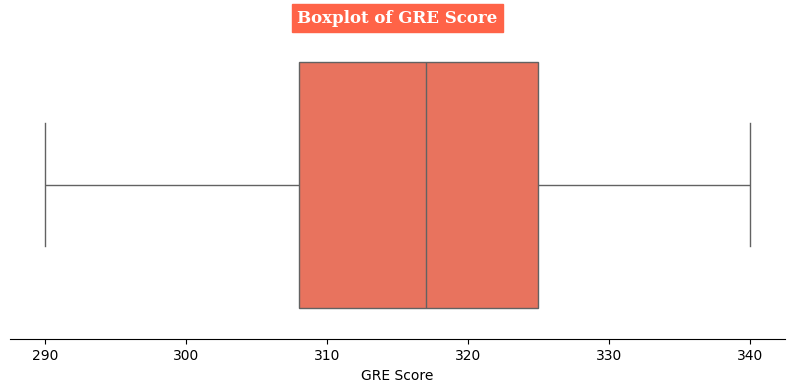

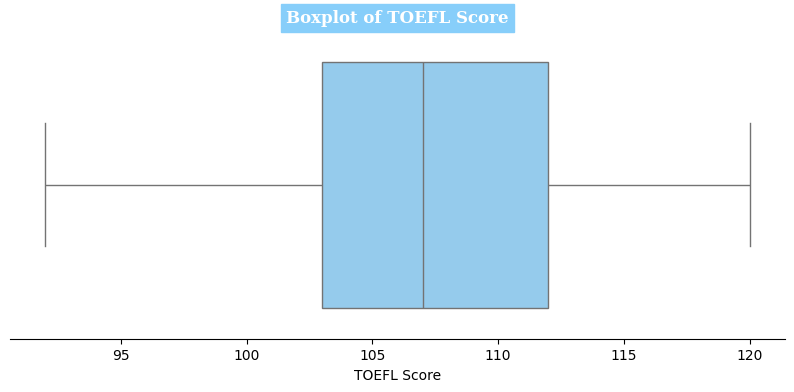

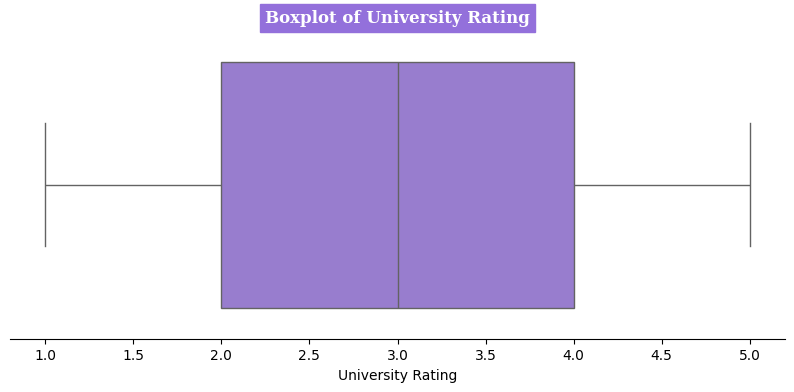

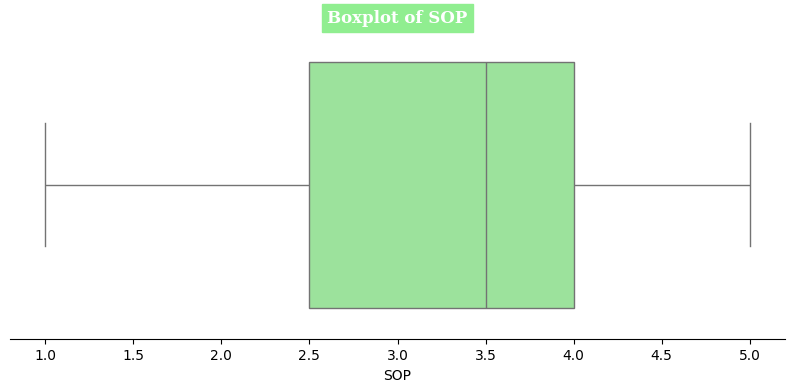

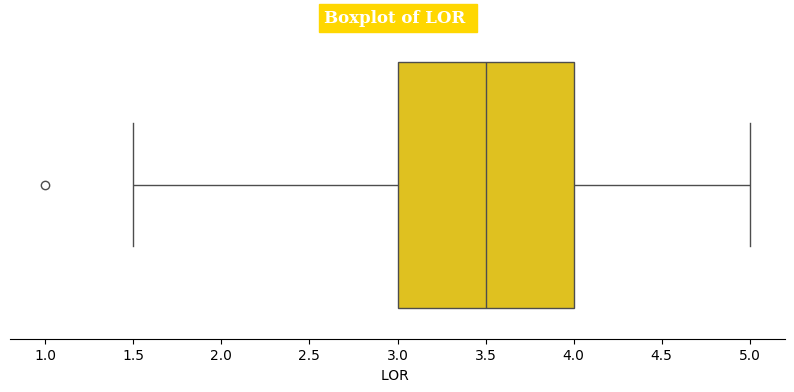

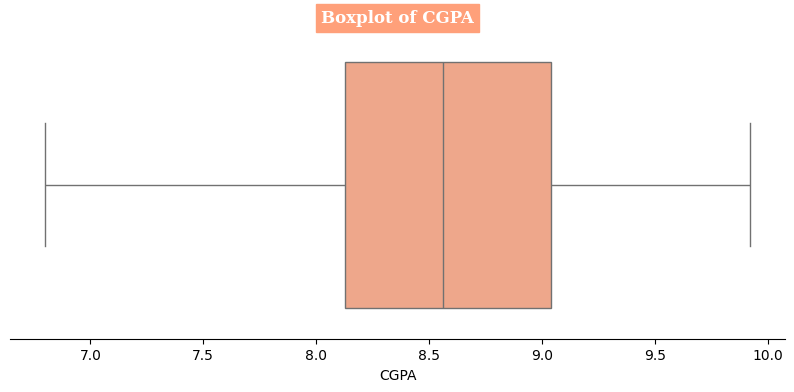

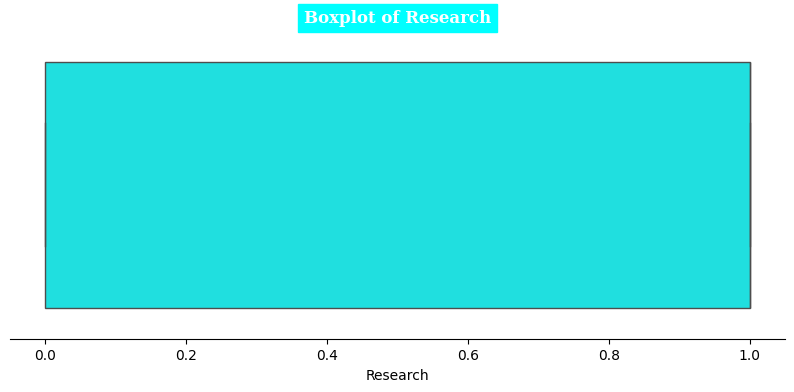

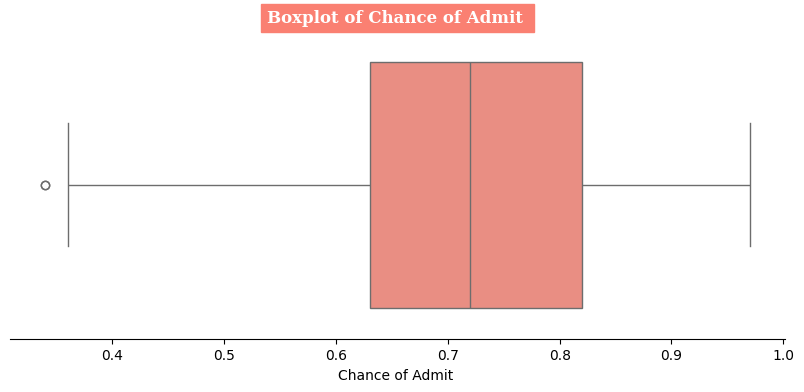

In [302]:
# Create box plots for each continuous variable
# Loop through the variables and create the box plots
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=copy_Jamboree_data[col], color=colors[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=colors[i], color='w')

    plt.show()


### **Insights**

The dataset does not contain any duplicates.

No null values are present in dataset.

Total number of unique values in GRE score, TOEFL score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit are 49, 29, 5, 9, 9, 184, 2, 61 respectively.

## **Graphical Analysis:**


#### **Univariate Analysis**

In [303]:
cp = 'Greens'

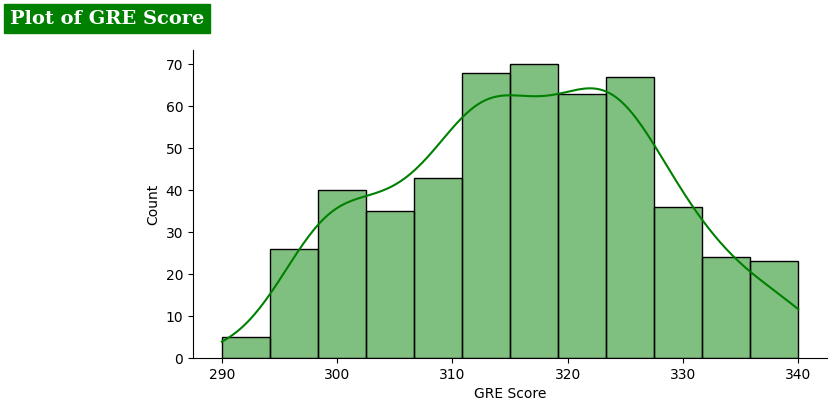

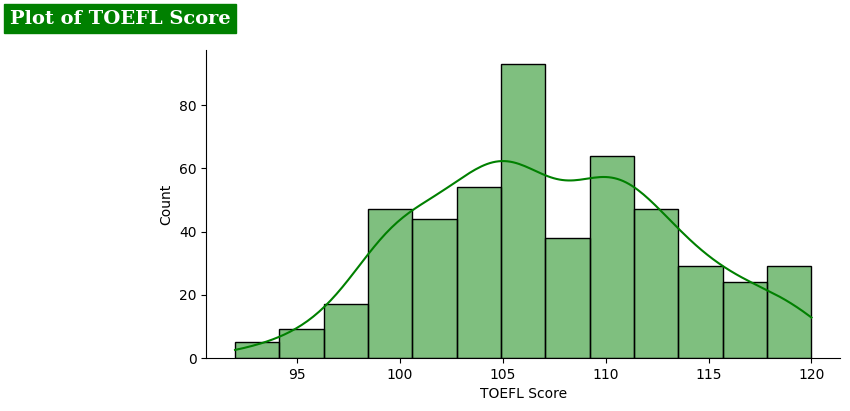

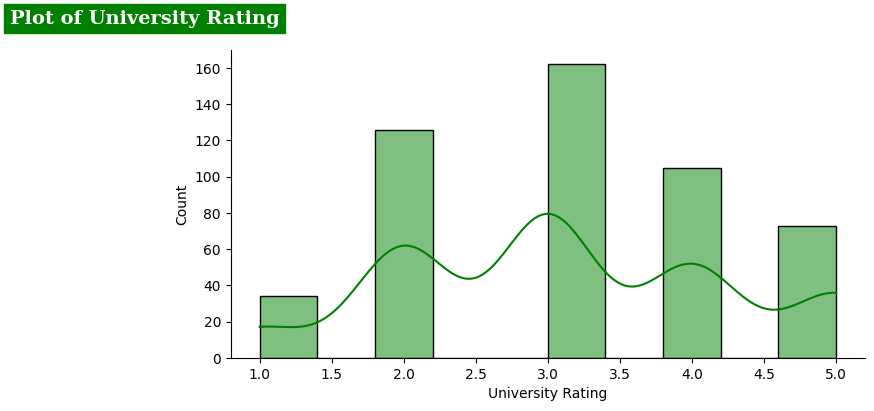

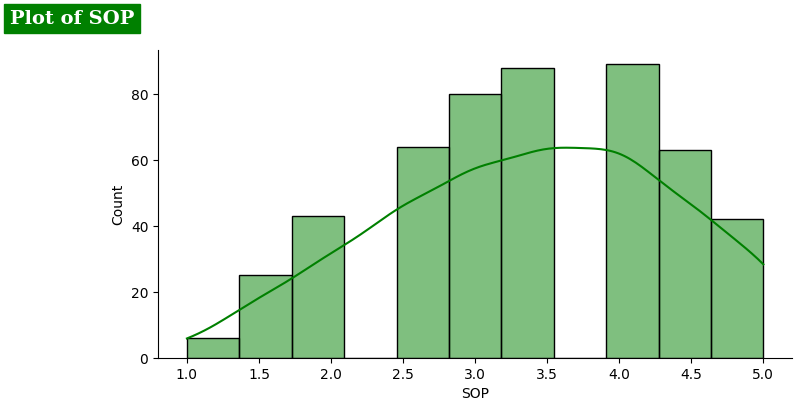

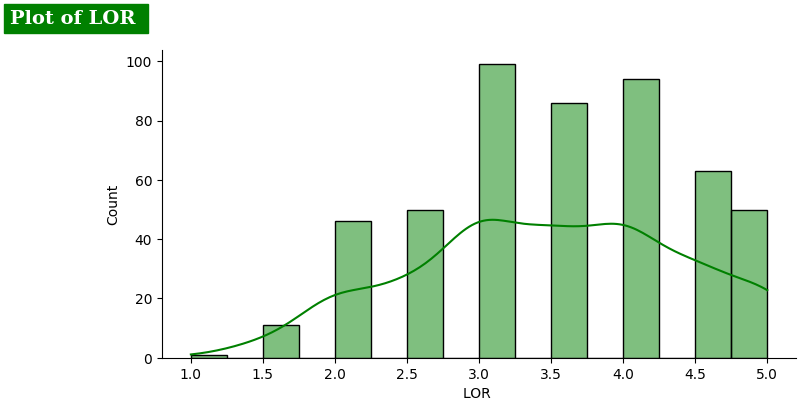

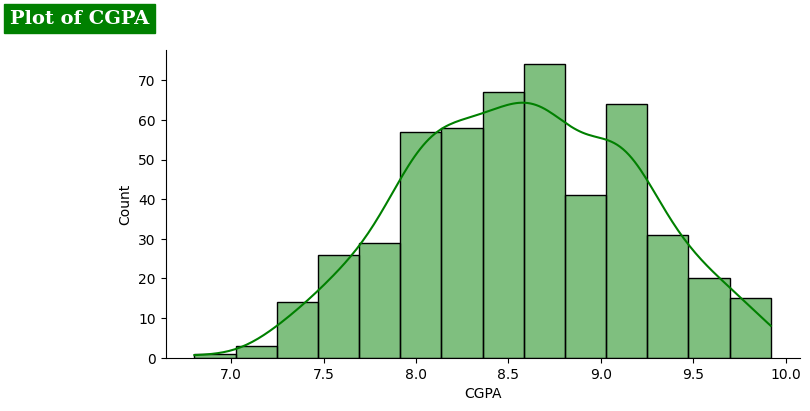

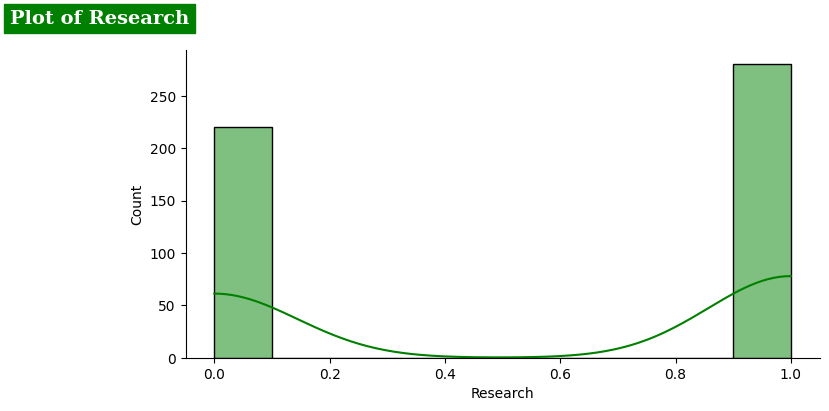

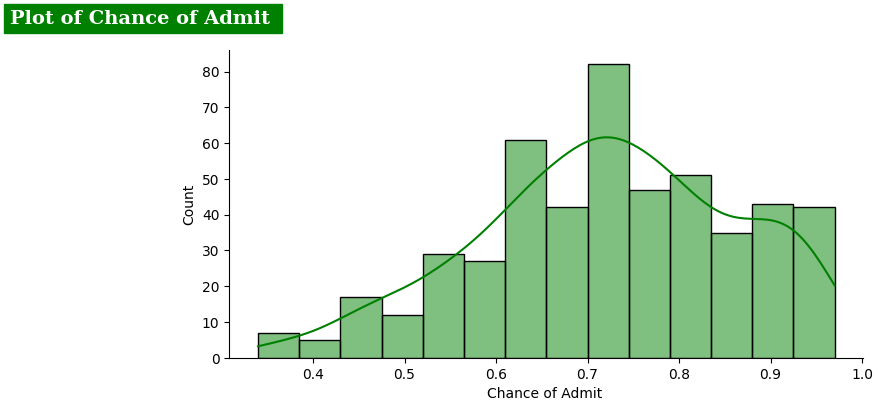

In [304]:
for _ in copy_Jamboree_data.columns:
    plt.style.use('default')
    plt.figure(figsize = (18,4))
    plt.subplot(122)
    sns.histplot(copy_Jamboree_data[_],kde=True,color='g')
    plt.suptitle(f'Plot of {_}',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    sns.despine()
    plt.show()

#### **Barplots/countplots of all the categorical variables: Distribution of all other categorical features :**

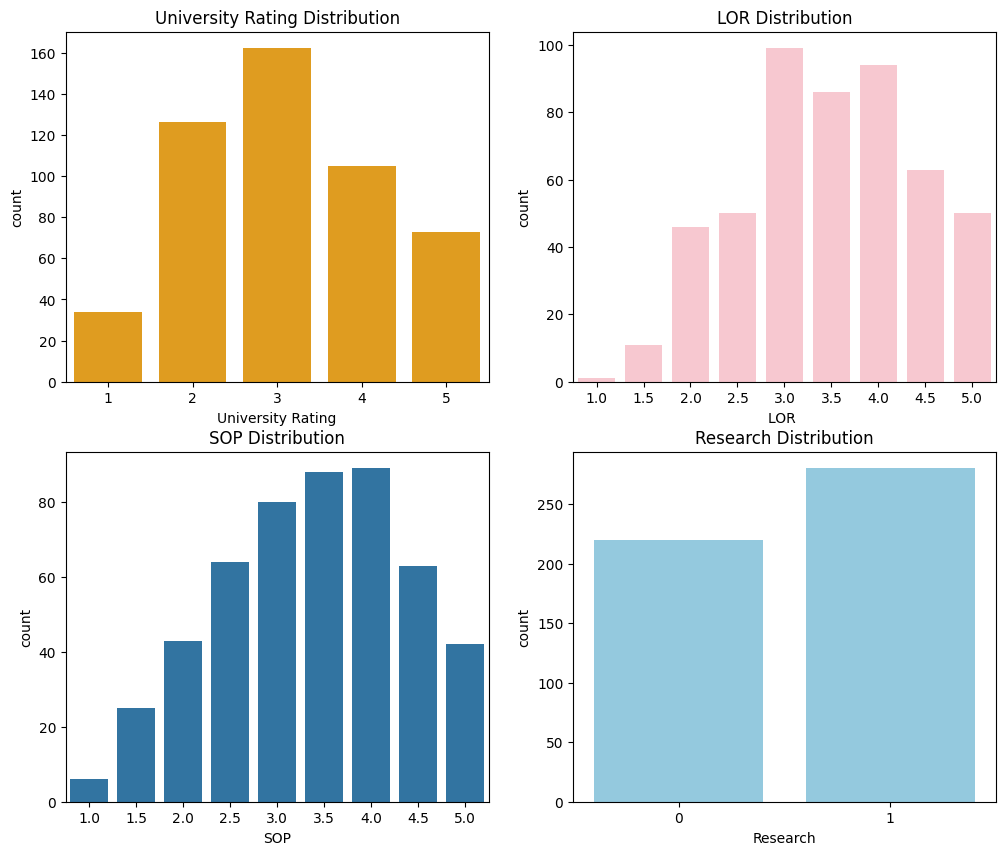

In [305]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.countplot(data=copy_Jamboree_data, x='University Rating', ax=ax[0, 0], color ='orange').set_title('University Rating Distribution')
sns.countplot(data=copy_Jamboree_data, x='LOR ', ax=ax[0, 1], color ='pink').set_title('LOR Distribution')
sns.countplot(data=copy_Jamboree_data, x='SOP', ax=ax[1, 0]).set_title('SOP Distribution')
sns.countplot(data=copy_Jamboree_data, x='Research', ax=ax[1, 1], color ='skyblue').set_title('Research Distribution')
plt.show()

Distribution plots of all the continuous variable(s):

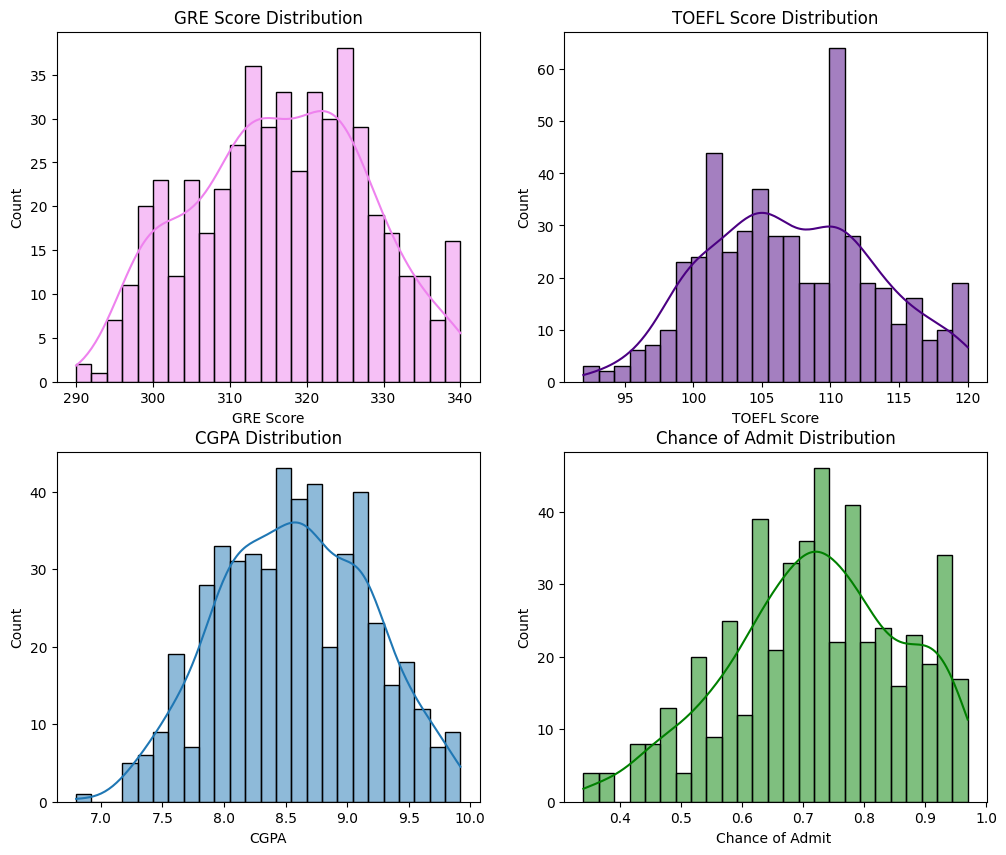

In [306]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.histplot(copy_Jamboree_data['GRE Score'],kde = True ,ax=ax[0, 0],bins = 25 ,color='violet').set_title('GRE Score Distribution')
sns.histplot(copy_Jamboree_data['TOEFL Score'],kde = True , ax=ax[0, 1],bins = 25 , color='indigo').set_title('TOEFL Score Distribution')
sns.histplot(copy_Jamboree_data['CGPA'],kde = True ,bins = 25, ax=ax[1, 0]).set_title('CGPA Distribution')
sns.histplot(copy_Jamboree_data['Chance of Admit '],kde = True ,bins = 25 , ax=ax[1, 1], color='green').set_title('Chance of Admit Distribution')
plt.show()

#### Bivariate Analysis

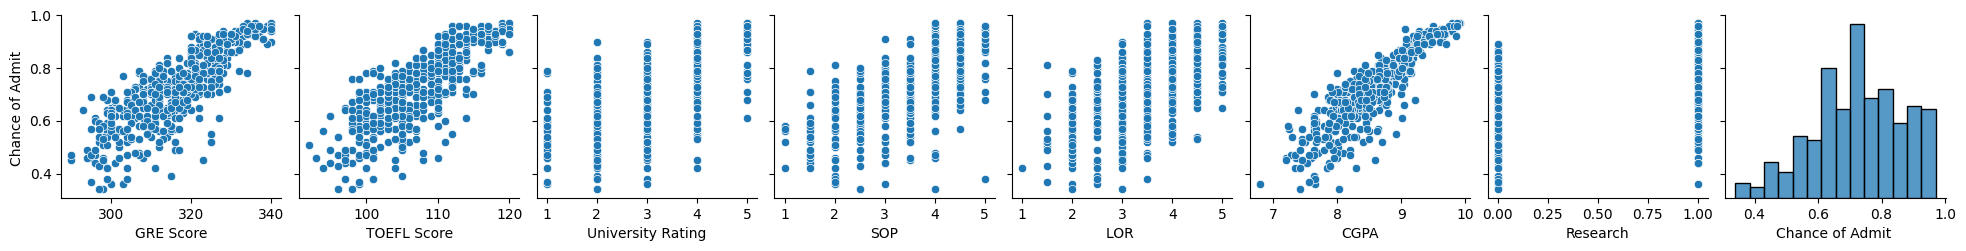

In [307]:
sns.pairplot(data=copy_Jamboree_data, y_vars='Chance of Admit ')
plt.show()

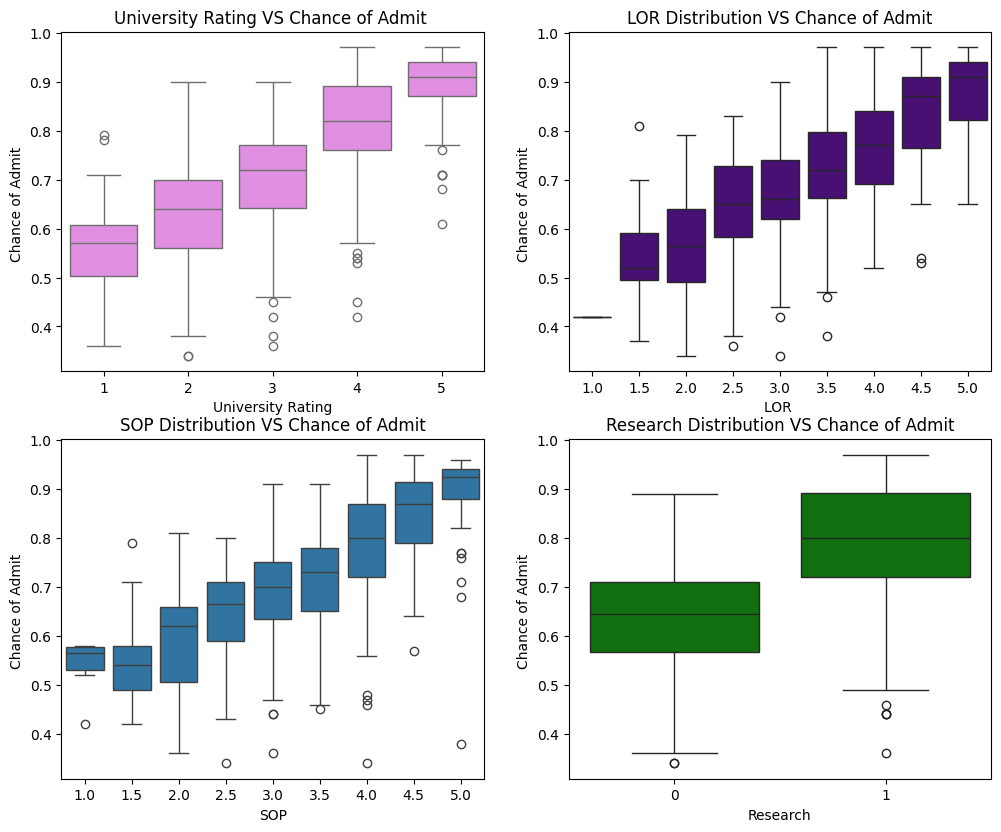

In [308]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9.7))
sns.boxplot(data=copy_Jamboree_data, x='University Rating',y = 'Chance of Admit ', ax=ax[0, 0], color ='violet').set_title('University Rating VS Chance of Admit ')
sns.boxplot(data=copy_Jamboree_data, x='LOR ',y = 'Chance of Admit ', ax=ax[0, 1], color ='indigo').set_title('LOR Distribution VS Chance of Admit')
sns.boxplot(data=copy_Jamboree_data, x='SOP',y = 'Chance of Admit ', ax=ax[1, 0]).set_title('SOP Distribution VS Chance of Admit')
sns.boxplot(data=copy_Jamboree_data, x='Research',y = 'Chance of Admit ', ax=ax[1, 1], color ='green').set_title('Research Distribution VS Chance of Admit')
plt.show()

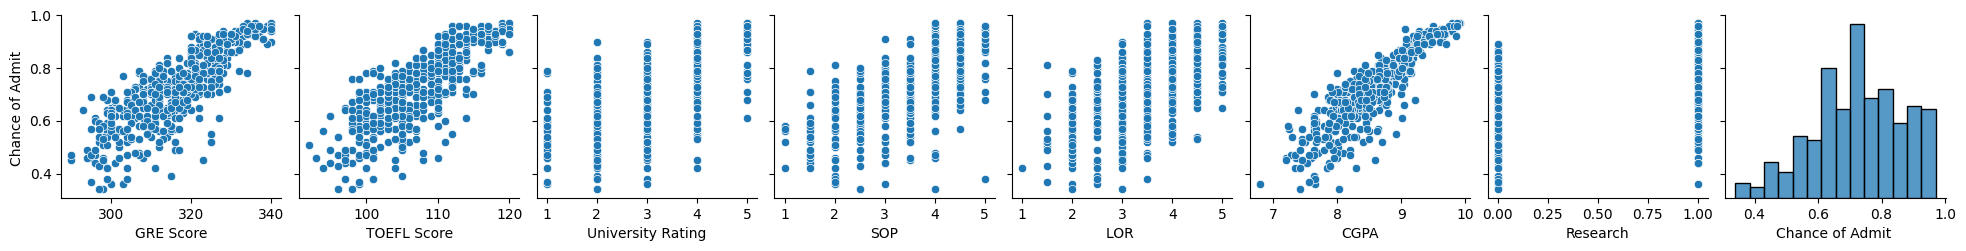

In [309]:
sns.pairplot(data=copy_Jamboree_data, y_vars='Chance of Admit ')
plt.show()

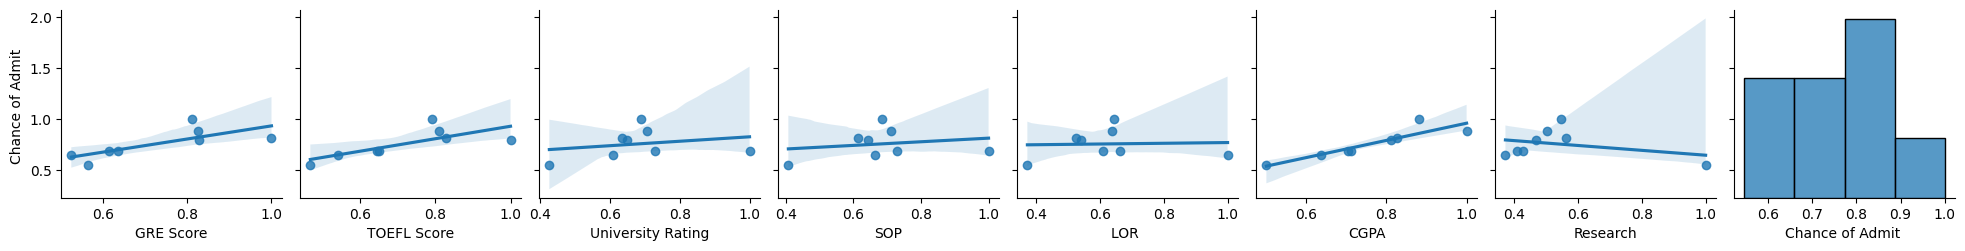

In [310]:
sns.pairplot(copy_Jamboree_data.corr(),y_vars='Chance of Admit ',kind= 'reg')

In [311]:
corr_matrix = copy_Jamboree_data.corr().round(2)

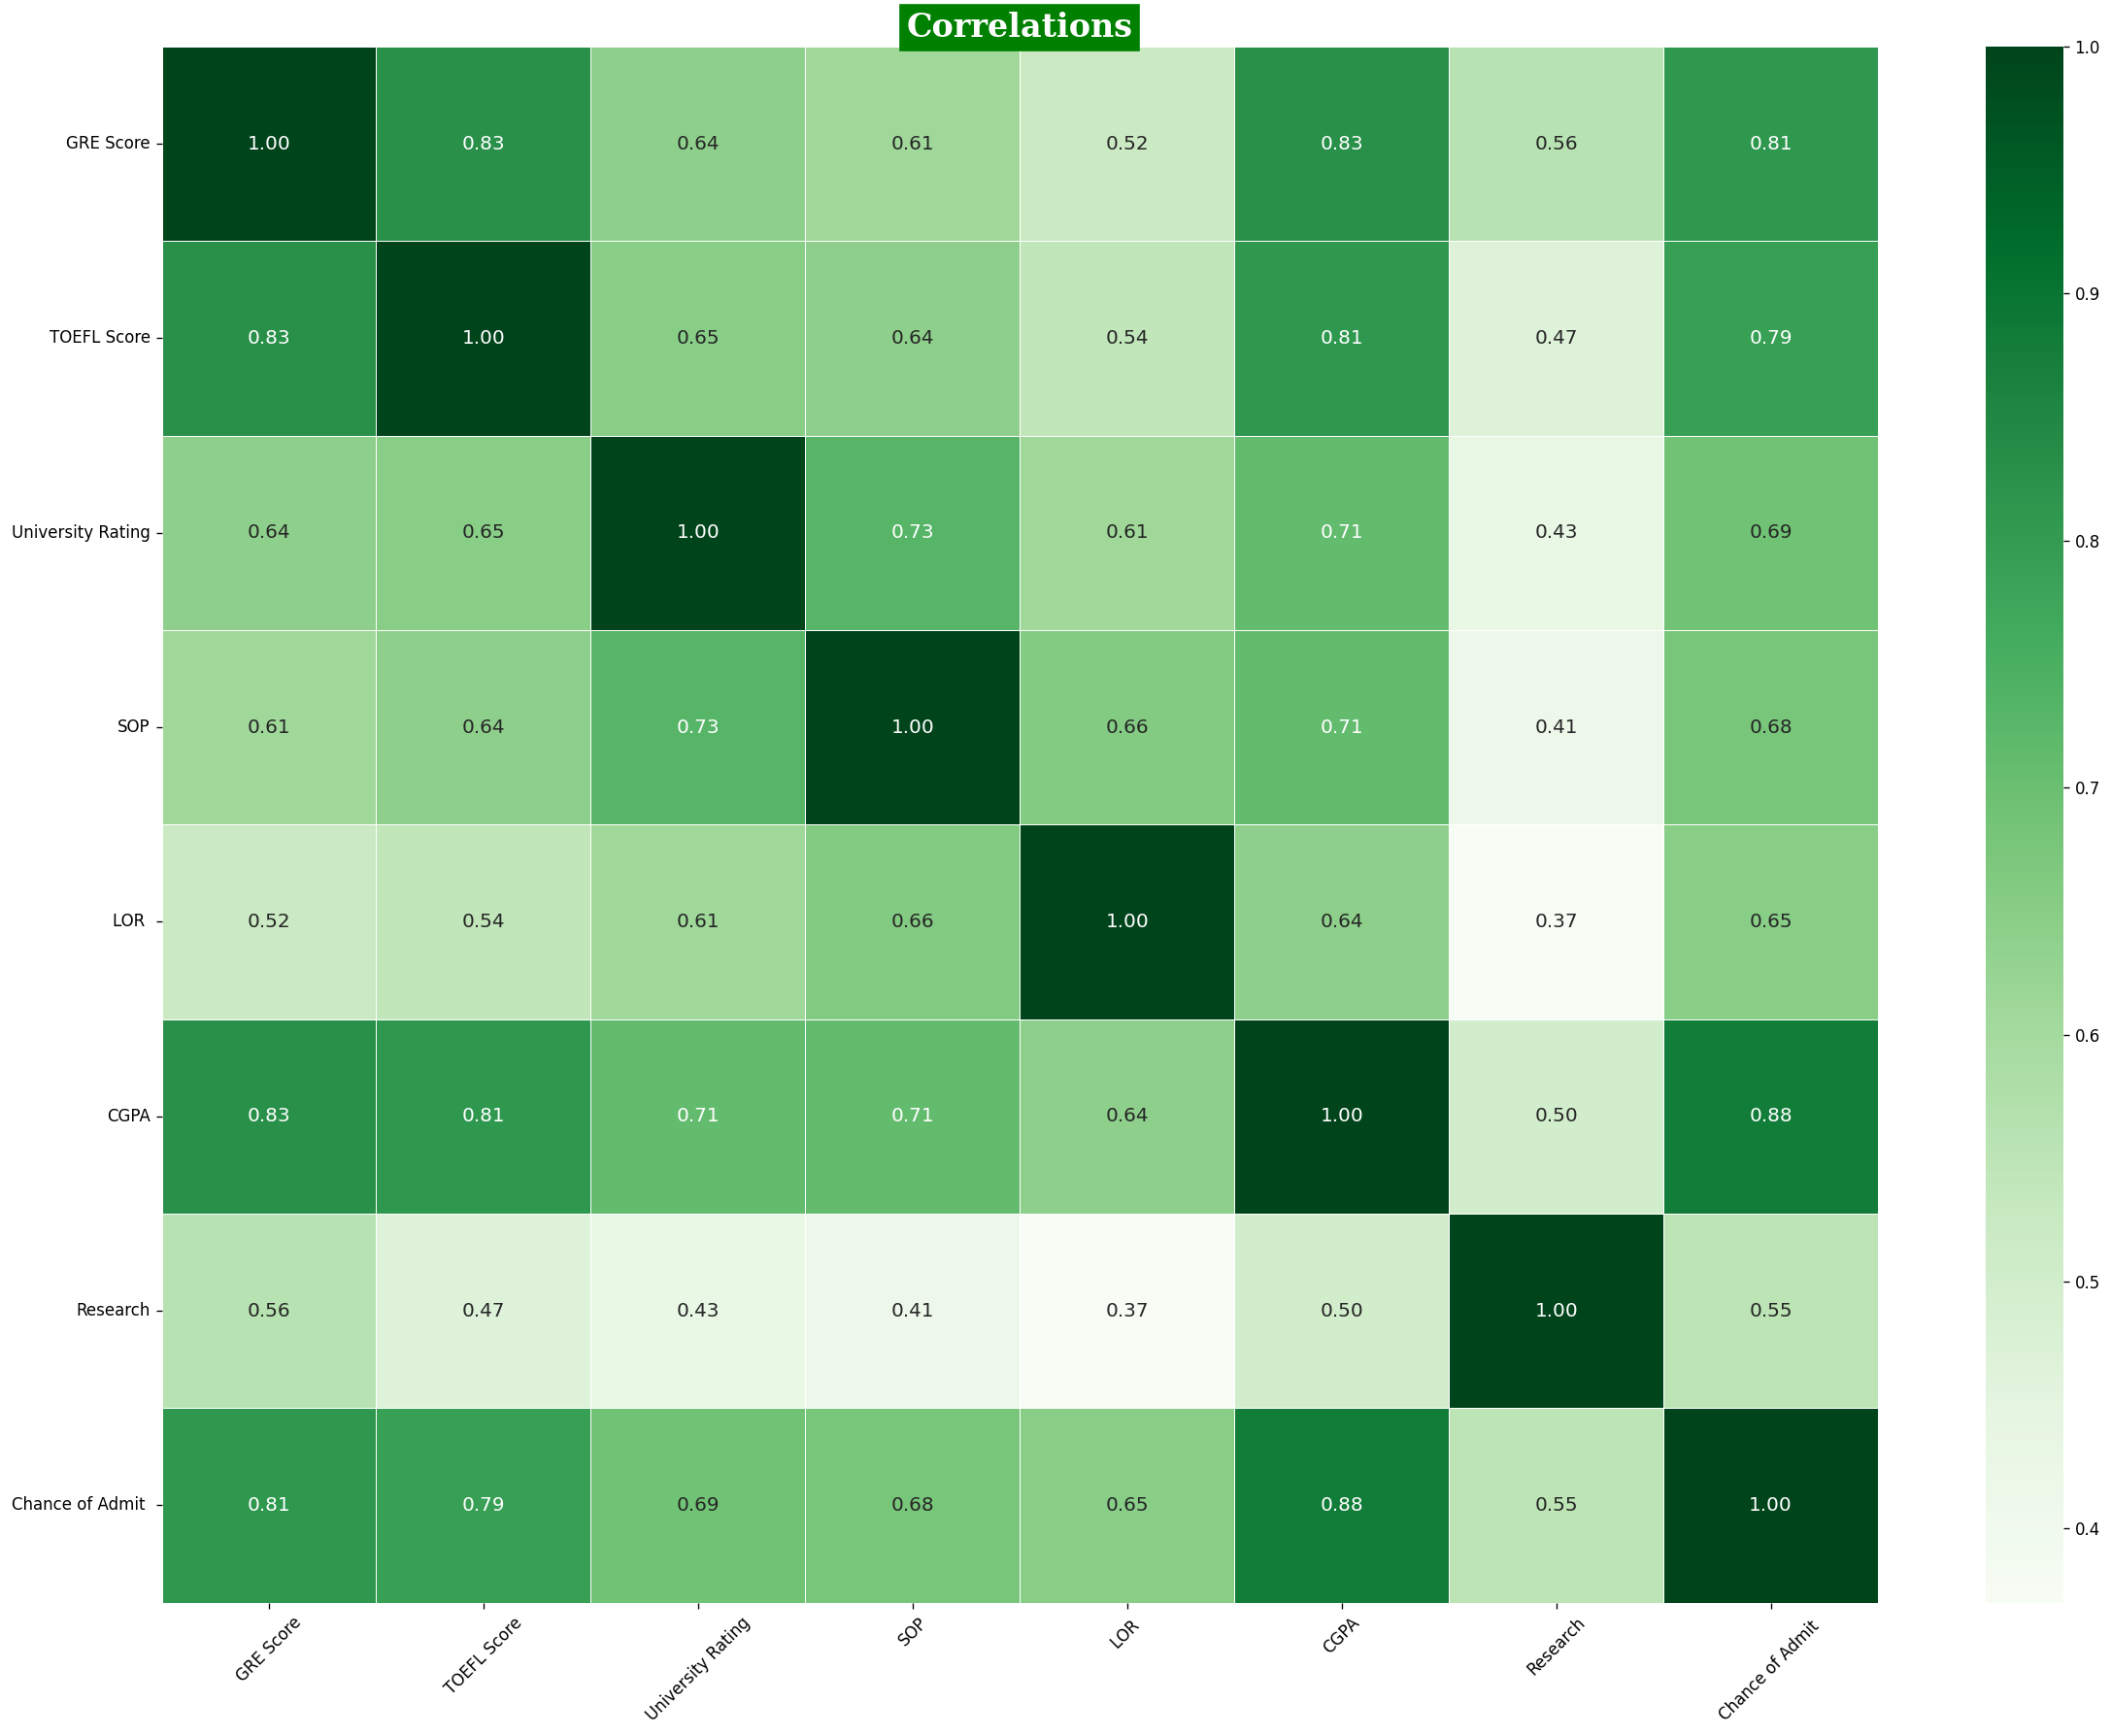

In [312]:
# Calculate and round the correlation matrix

# Create the heatmap
plt.figure(figsize=(20, 15), dpi=120)  # Increase the figure size and DPI
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 12})
plt.title('Correlations', fontsize=20, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
plt.yticks(rotation=0)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout to ensure no clipping

plt.show()

### **Insights**

From the above all observation are:

- By the correlation heatmap , We can observe GRE_score ,TOEFL_score and CGPA have very high correlation with Change of admission.

- University rating, SOP ,LOR and Research are comparatively slightly less correlated than other features.

- Independent Variables (Input datas): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA,Research

- Target/Dependent Variable : Chance of Admit (the value we want to predict)

By observing the joint plots, we can gain insights into the relationship between each independent variable and the target variable.
Here are the observations that we can make from the joint plots:

- GRE , TOEFl score, CGPA VS CHANCE OF ADMISSION: It shows the positive relatioinship between the them, relationship is linear and there are some outlier also present.

### Checking for Linearity : How features are correlated with Target variable - chance of admit :

GRE Score


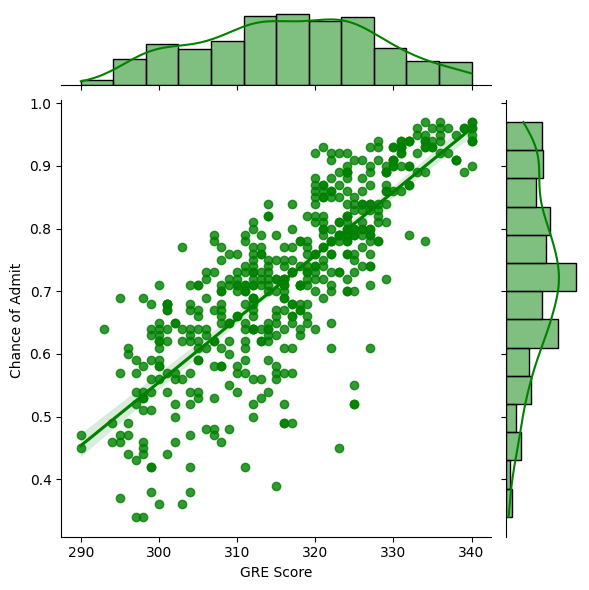

TOEFL Score


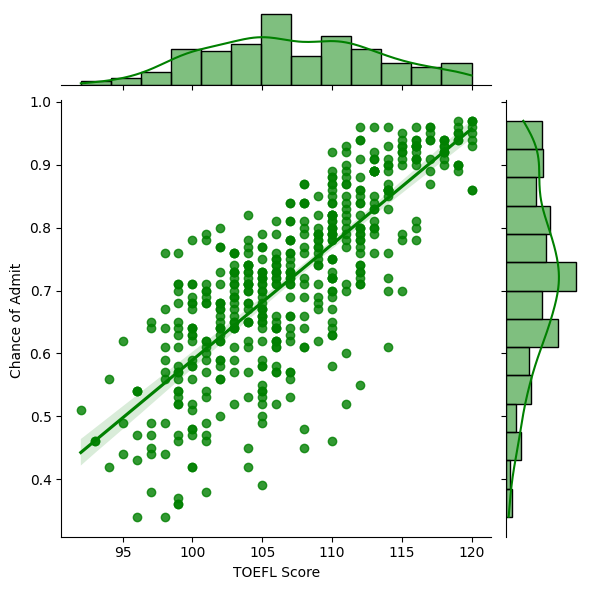

University Rating


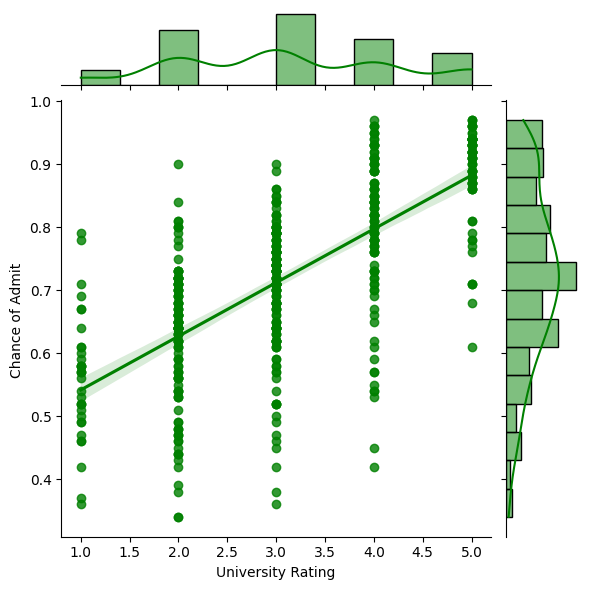

SOP


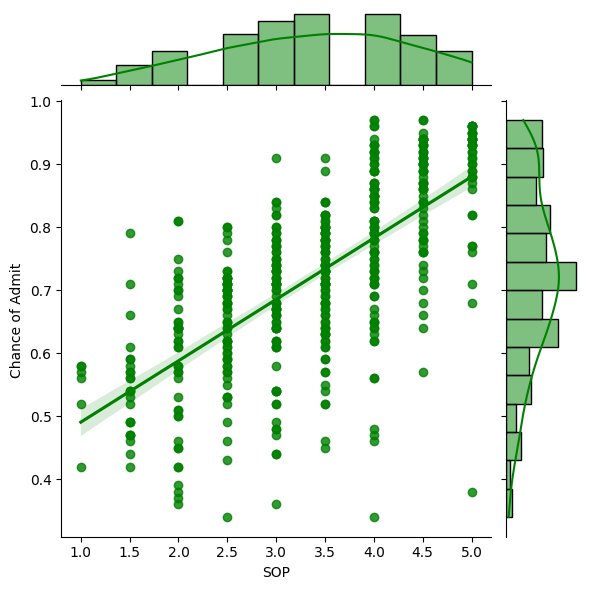

LOR 


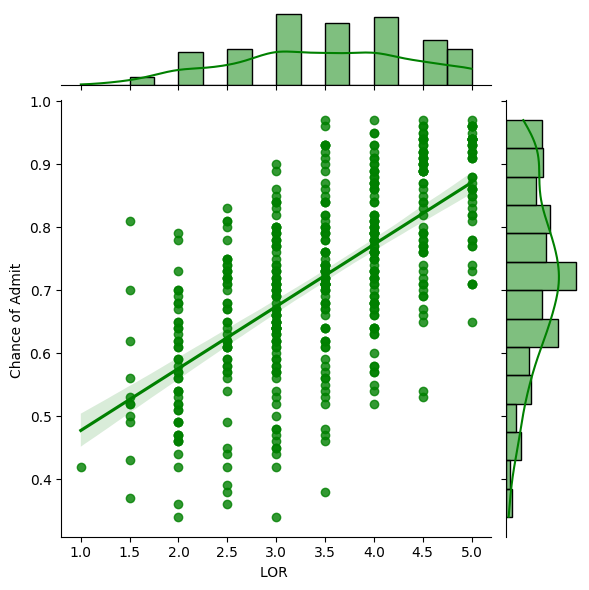

CGPA


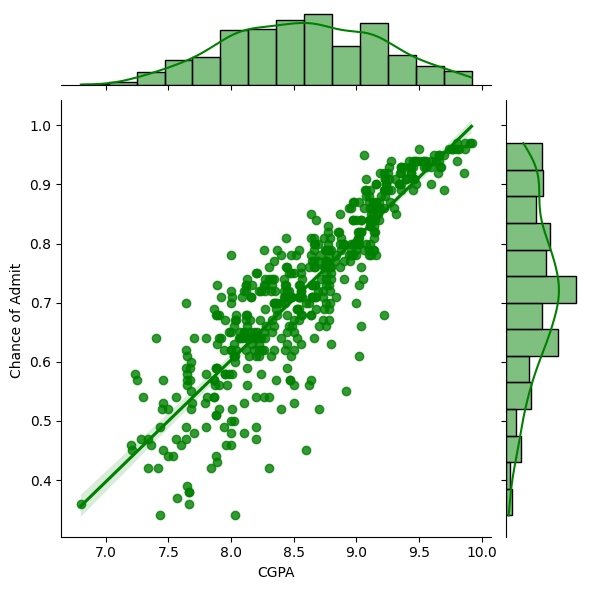

Research


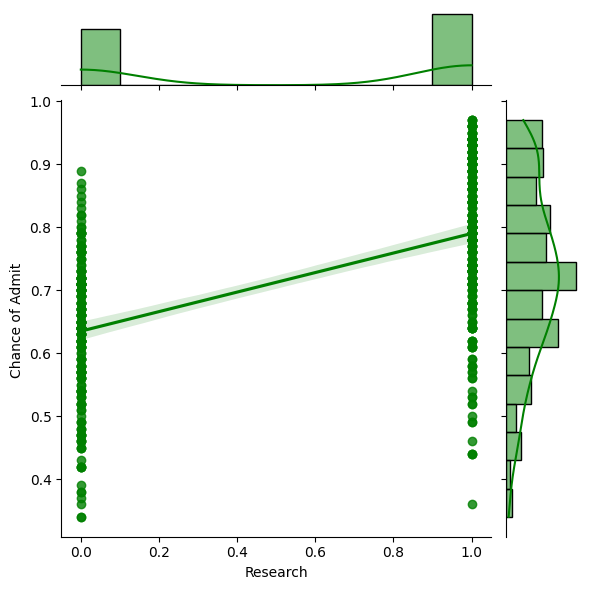

In [313]:
for col in copy_Jamboree_data.columns[:-1]:
    print(col)
    sns.jointplot(data=copy_Jamboree_data,x=copy_Jamboree_data[col],y=copy_Jamboree_data["Chance of Admit "],kind="reg",color='g')
    plt.show()

### **Insights**  
With higher GRE score , there is high probability of getting an admition.

Students having high toefl score , has higher probability of getting admition .

## **Data Modelling**

#### **Standardization**

In [314]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(copy_Jamboree_data), columns = copy_Jamboree_data.columns)

In [315]:
scaled_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


#### **Train-Test data split**

In [316]:
x = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]
print(x.shape , y.shape)

(500, 7) (500,)


In [317]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


## **Linear Regression**

In [318]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [319]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [320]:
# Check the r2 score on trian data:
print('R2-Score On Train data:', r2_score(y_train, lr_model.predict(x_train)))
# Check the r2 score on test data:
print('R2-Score on Test data:', r2_score(y_test, lr_model.predict(x_test)))

R2-Score On Train data: 0.8210671369321554
R2-Score on Test data: 0.8188432567829628


#### All the feature's coefficients and Intercept

In [321]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1),columns=copy_Jamboree_data.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


In [322]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)

    # Determine the number of predictors (p)
    if len(model.coef_.shape) == 1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])

    # Calculate evaluation metrics
    MSE = np.round(mean_squared_error(y_true= y_actual, y_pred= y_forecast, squared=True), 2)
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast), 2)
    RMSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=False), 2)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast), 2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)), 2)

    # Return or print the results
    print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")


#### Linear Regression using OLS

In [323]:
new_x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, new_x_train)
results = model.fit()
# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          3.41e-142
Time:                        18:25:19   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

Conidering the very low p_valued Features and highly weighted coef features as the major contributers of Model Prediction, CGPA,GRE,TOEFL,LOR are the features
contributing to model building...

## **Testing Assumptions of Linear Regression Model**

1. **No multicolinearity:**
    >   Multicollinearity check by VIF(Variance Inflation Factor) score.   
    >   Variables are dropped one-by-one till none has a VIF>5.
    
    
2. **Mean of Residuals** should be close to zero.


3. Linear relationship between independent & dependent variables.

    - This can be checked using the following methods:  
        - Scatter plots  
        - Regression plots  
        - Pearson Correlation  
    
    
4. Test for **Homoscedasticity**

    - Create a scatterplot of residuals against predicted values.
    - Perform a Goldfeld-Quandt test to check the presence of
    
    >- **Heteroscedasticity** in the data.  
        - If the obtained `p-value > 0.05`, there is no strong evidence of heteroscedasticity.
    
    
5. Normality of Residuals

    - Almost bell-shaped curve in residuals distribution.
      
        
    
6. Impact of **Outliers**

###  Multicolinearity check:

*VIF (Variance Inflation Factor)* is a measure that quantifies the severity of multicollinearity in a regression analysis.  
It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

`VIF(j) = 1 / (1 - R(j)^2)`

Where:
- j represents the jth predictor variable.
- R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictorvriables.

"
- Calculate the VIF for each variable.
- Identify variables with VIF greater than 5.
- Drop the variable with the highest VIF.
- Repeat steps 1-3 until no variable has a VIF eater than 5.  
"

In [324]:
# Import library to check for vif scores;
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [325]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.653698
0,GRE Score,4.489201
1,TOEFL Score,3.665067
3,SOP,2.785753
2,University Rating,2.571847
4,LOR,1.977668
6,Research,1.517206


#### **Insights:**

As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity between the features.

------
### **Mean of Residuals:**

- The mean of residuals represents the average of residual values in a regression model.
- Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.  
- The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average.
- However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.
- **The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model.**

In [326]:
residuals_test = (y_test - y_pred_test)
residuals_test.mean()

-0.03867840379282768

In [327]:
residuals_train = (y_train - y_pred_train)
residuals_train.mean()

9.436895709313831e-18

### **Insights:**

Since the mean of residuals is very close to 0, we can say that the model is UnBiased.

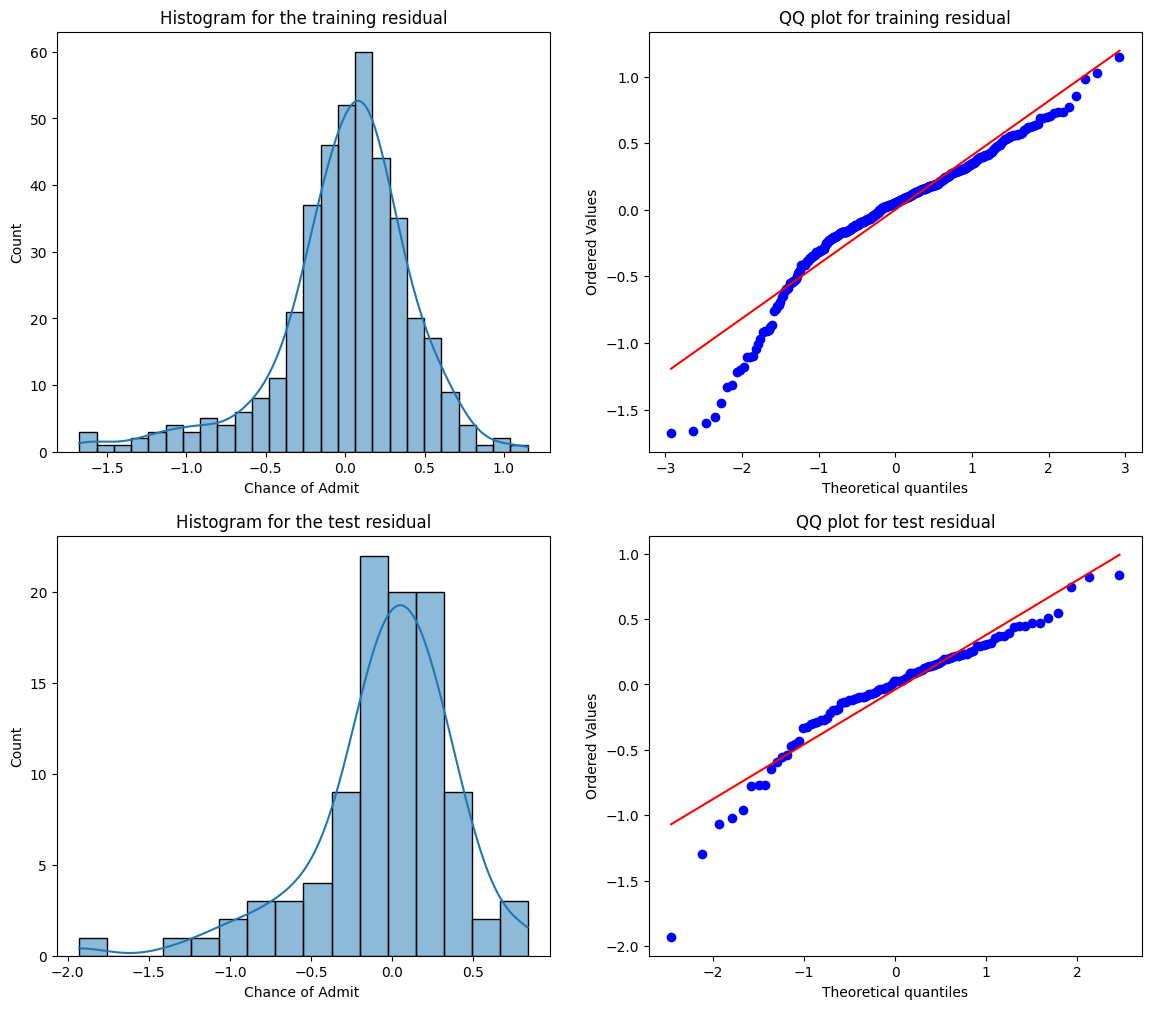

In [328]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.histplot(residuals_train,kde = True)
plt.title('Histogram for the training residual')
plt.subplot(2,2,2)
stats.probplot(residuals_train, plot = plt)
plt.title('QQ plot for training residual')
plt.subplot(2,2,3)
sns.histplot(residuals_test,kde = True)
plt.title('Histogram for the test residual')
plt.subplot(2,2,4)
stats.probplot(residuals_test, plot = plt)
plt.title('QQ plot for test residual')
plt.show()

From the Histplot & kdeplot for the test data , we can see that the Residuals are left skewed and not perfectly
normally distributed.
The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not Gaussian.

### The Mean of Residuals is Nearly Zero?

In [329]:
# The Mean of residulas
residuals_test.mean(), residuals_train.mean()

(-0.03867840379282768, 9.436895709313831e-18)

**Conclusion:**

By examing the difference between the y_actual and y_predicted value, it is observed that the mean of the
Errors are approximately been vary close to Zero.
Which suggests that, on average, the model is not systematically underestimating or overestimating the
target variable. A mean residual close to zero indicates that the model is making predictions that are, on
average, accurate. #Linearity of varibales:
Linearity of variables refers to the assumption that there is a linear relationship between the independent
variables and the dependent variable in a regression model.
It means that the effect of the independent variables on the dependent variable is constant across different
levels of the independent variables.

### Linear Relationships:

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

1. Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
2. U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
3. Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
4. Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.  

If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.


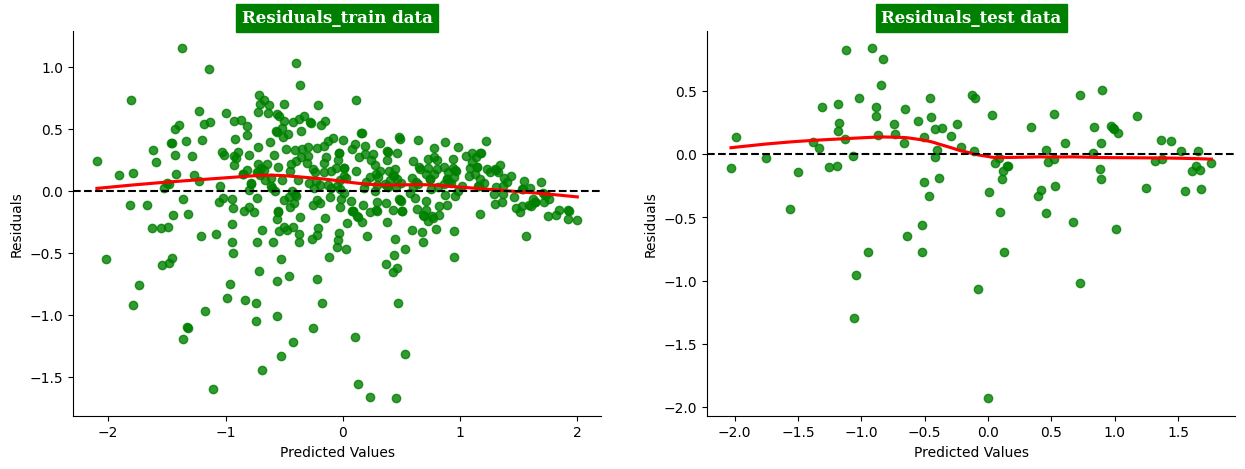

In [330]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_train, y=residuals_train, lowess=True, color='g',line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_test, y=residuals_test, lowess=True,color='g' ,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

### Insights:
    
From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.


## Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

1. Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

2. Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

3. Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

4. Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

#### Scatterplot of residuals with each independent variable to check for Homoscedasticity

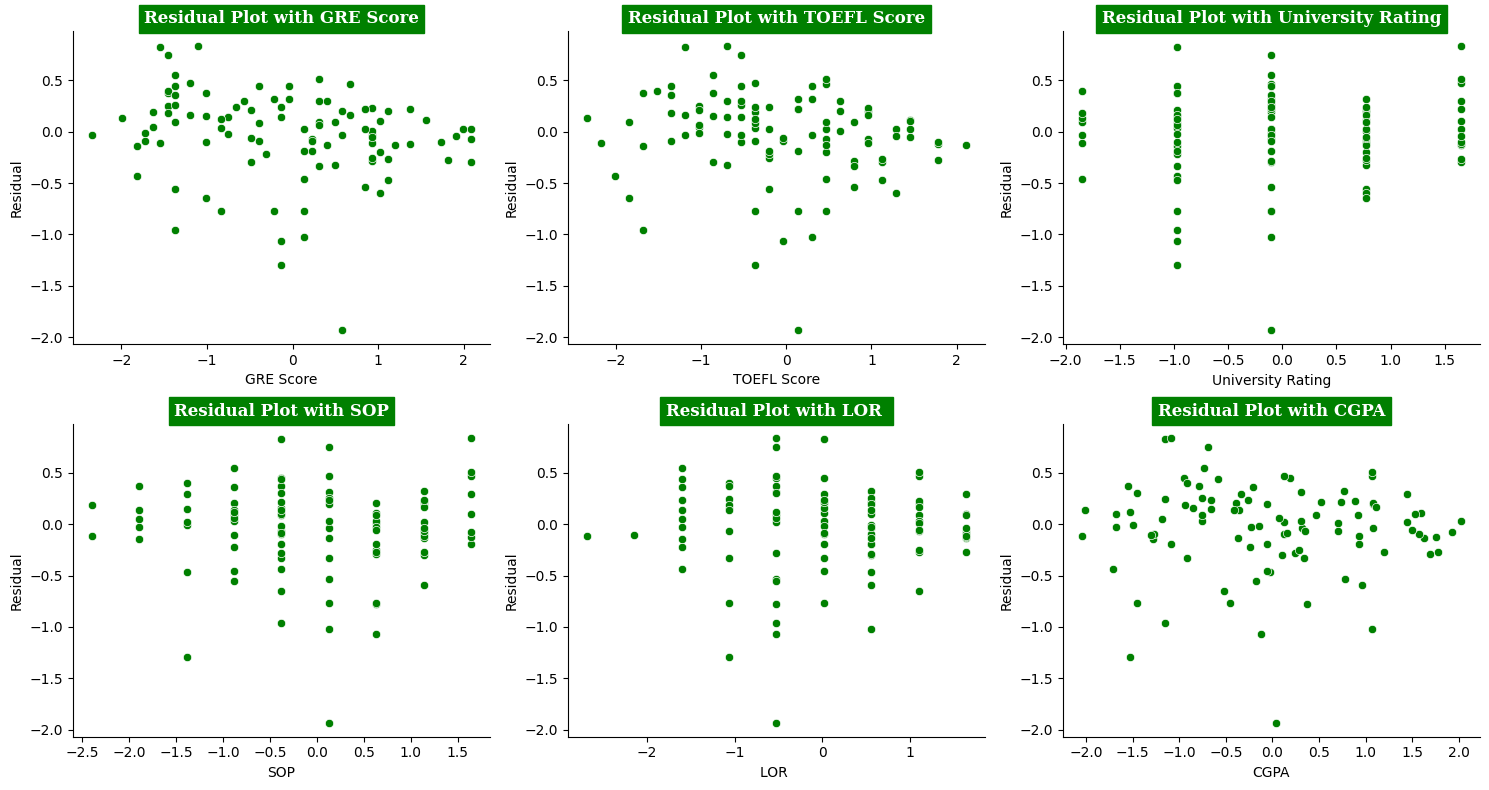

In [331]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(15,8))

for i, col in enumerate(x_test.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=x_test[col], y=residuals_test, color='g')
    plt.title(f'Residual Plot with {col}', fontsize=12, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
    plt.xlabel(col)
    plt.ylabel('Residual')

plt.tight_layout()
sns.despine()
plt.show()

In [332]:
ols_model = results
predicted = ols_model.predict()
residuals = ols_model.resid

In [333]:

# Assuming results is your fitted OLS model
ols_model = results

# Obtain residuals and predicted values
residuals = ols_model.resid
predicted = ols_model.predict()

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'predicted': predicted,
    'residuals': residuals
})

# Sort data by predicted values
df_sorted = df.sort_values(by='predicted').reset_index(drop=True)

# Split data into two groups
n = len(df_sorted)
split_point = n // 2
group1 = df_sorted.iloc[:split_point]
group2 = df_sorted.iloc[split_point:]

# Extract the independent variables from the original model
X = ols_model.model.exog  # Get the original design matrix

# Split the design matrix according to the groups
X_group1 = X[:split_point]
X_group2 = X[split_point:]

# Fit models to each group
model_group1 = sm.OLS(group1['residuals'], X_group1).fit()
model_group2 = sm.OLS(group2['residuals'], X_group2).fit()

# Calculate residual variances
var_group1 = np.var(model_group1.resid, ddof=1)
var_group2 = np.var(model_group2.resid, ddof=1)

# Compute Goldfeld-Quandt test statistic
F_statistic = var_group1 / var_group2

# Compute p-value for the F-statistic
df1 = X_group1.shape[1] - 1  # Degrees of freedom for group1
df2 = len(group2) - X_group2.shape[1]  # Degrees of freedom for group2
p_value = 1 - stats.f.cdf(F_statistic, df1, df2)

# Create a DataFrame for the test results similar to Breusch-Pagan
goldfeld_quandt_test = pd.DataFrame({
    'value': [F_statistic, p_value],
}, index=['F-statistic', 'p-value'])

# Display the results
print(goldfeld_quandt_test)

                value
F-statistic  2.338222
p-value      0.025956


**Insights:**

Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that Homoscedasticity is met .
Since the p-value is much lower than the alpha value, we can Reject the null hypothesis and conclude that Heteroscedasticity is present
Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals,
indicating that the variance of the residuals is not constant across all levels of the independent variables.
This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.
>

### Normality of Residuals:

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

> `Residual Histogram`: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

> `Q-Q Plot (Quantile-Quantile Plot)`: This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

> `Shapiro-Wilk Test`: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.  
    >> **`Anderson-Darling or Jarque_Bera`** can also be done as data size increases.
  
> `Skewness and Kurtosis`: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

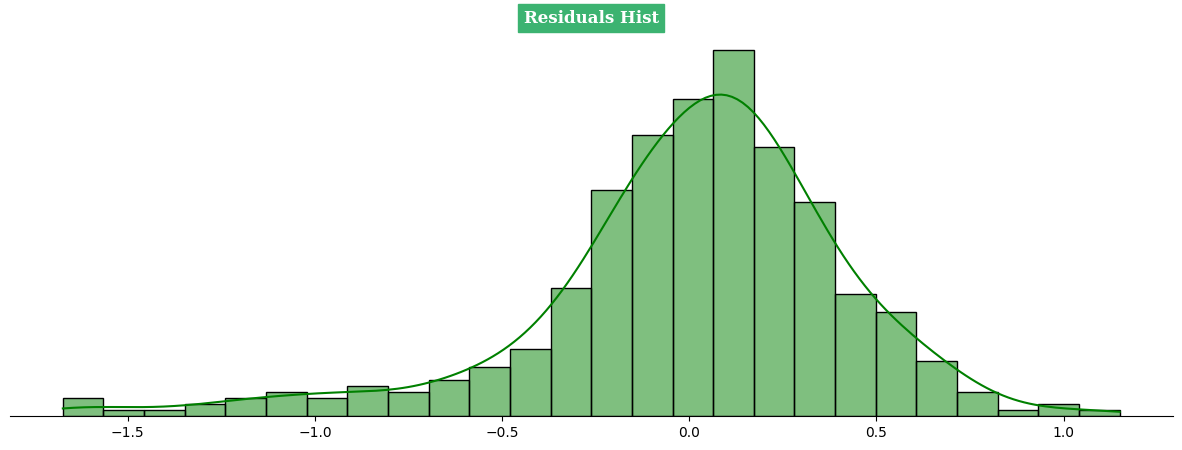

In [334]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

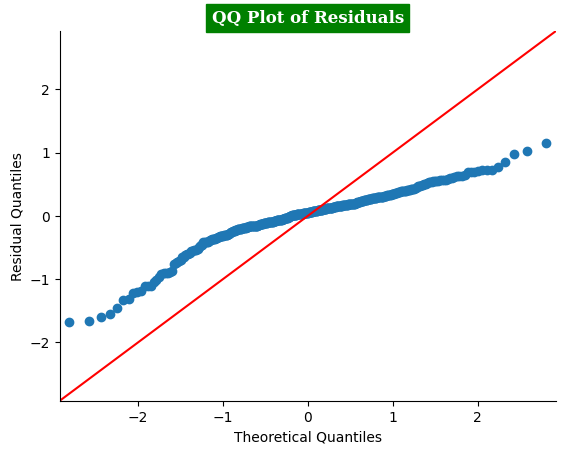

In [335]:
# QQ-Plot of residuals
plt.figure(figsize=(15,5))
sm.qqplot(residuals,line='45')
plt.title('QQ Plot of Residuals',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show();

### JARQUE BERA test:

In [336]:
jb_stat, jb_p_value = stats.jarque_bera(residuals)


print("Jarque-Bera Test Statistic:", jb_stat)
print("p-value:", jb_p_value)

if jb_p_value < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera Test Statistic: 190.09887364276915
p-value: 5.25477446043155e-42
Reject the null hypothesis: Residuals are not normally distributed.


#### Insights:

From the Histplot & kdeplot , we can see that the Residuals are `left skewed` and not perfectly normally distributed.

The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not `Gaussian`.

From Jarque Bera test , we conclude that the Residuals are `Not Normally distributed`.

Hence this assumption is not met.

-----

## Lasso and Ridge Regression - L1 & L2 Regularization

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

**Lasso Regression:**
Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

**Ridge Regression:**
Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

The main differences between Ridge and Lasso regression are:

* Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
* Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [337]:
model_lasso = Lasso(alpha=0.45)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.45)

#### ***reason for (alpha) ... try giving just lasso()... Weights are all zero.. inorder to manipulate that we introduce an alpha...***
In Lasso regression, the alpha parameter (λ) controls the strength of regularization. It's typically written as a positive value greater than 0. The choice of alpha affects the amount of shrinkage applied to the coefficients.

You would specify the alpha value when initializing the Lasso regression model. Typically, you would experiment with different alpha values to find the one that best balances model complexity and performance on your dataset through techniques like cross-validation.

For example, if you're using scikit-learn in Python, you would set the alpha parameter when creating the Lasso regression model object, like this:

```python
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=λ)
```

Here, `alpha` is set to 0.1, but you can adjust it based on your experimentation and validation results. Lower values of alpha result in less regularization, potentially leading to overfitting, while higher values increase regularization, potentially improving generalization to unseen data.

In [338]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

Ridge()

In [339]:
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)

y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

In [340]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=copy_Jamboree_data.columns[:-1])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.019231,0.0,0.0,0.0,0.0,0.408647,0.0,0.013919


In [341]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=copy_Jamboree_data.columns[:-1])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195584,0.130073,0.021575,0.013802,0.113221,0.478123,0.084673,0.007726


### Observation:
* While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

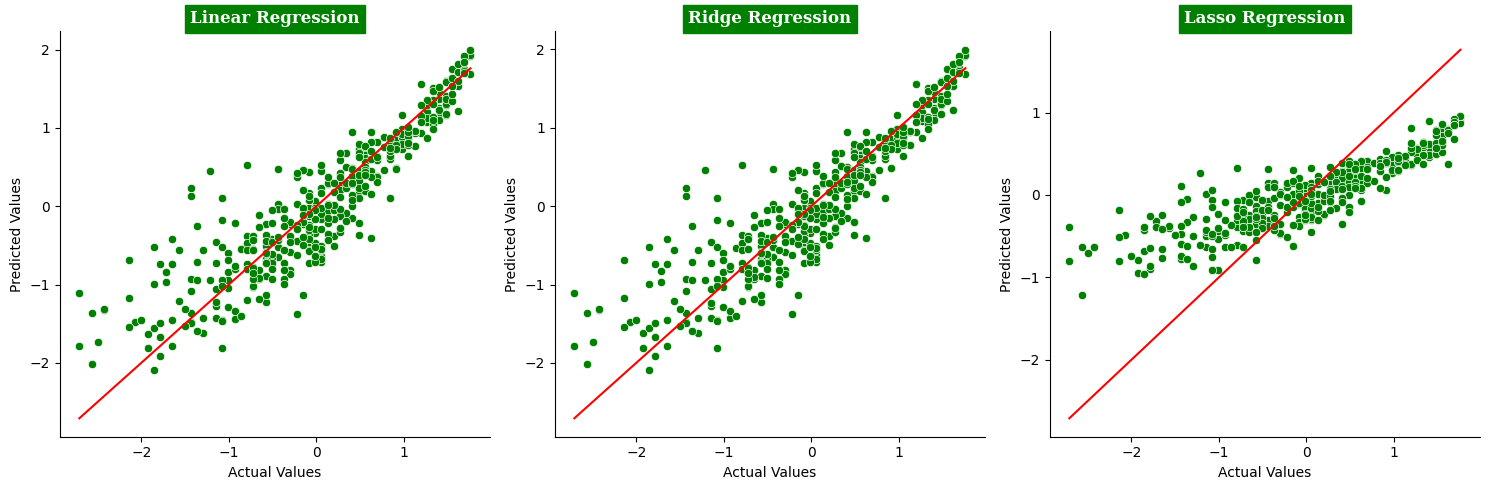

In [342]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), y_pred_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

### **Insights:**

We can observe that both `Linear Regression` and `Ridge Regression` have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

### ElasticNet regression:

Elastic Net regression is a type of regression analysis that combines penalties from both Lasso (L1 regularization) and Ridge (L2 regularization) methods. It is particularly useful when dealing with datasets that have high dimensionality and multicollinearity (correlation between predictors).

Here's how Elastic Net works:

1. **Objective Function**: In Elastic Net regression, the objective function includes two components: the residual sum of squares (RSS), which measures the difference between the observed and predicted values, and two penalty terms: one for L1 regularization and one for L2 regularization.

2. **L1 Regularization (Lasso)**: The L1 penalty encourages sparsity in the coefficient estimates by adding the absolute values of the coefficients to the objective function. This tends to force some coefficients to be exactly zero, effectively performing feature selection.

3. **L2 Regularization (Ridge)**: The L2 penalty adds the squared values of the coefficients to the objective function. This tends to shrink the coefficients towards zero, but it does not enforce sparsity as strongly as L1 regularization.

4. **Mixing Parameter (α)**: Elastic Net introduces a mixing parameter, α (alpha), which controls the balance between L1 and L2 regularization. When α = 0, Elastic Net reduces to Ridge regression, and when α = 1, it reduces to Lasso regression. Intermediate values of α allow for a combination of both penalties.

5. **Regularization Strength (λ)**: Additionally, Elastic Net includes a regularization strength parameter, λ (lambda), which controls the overall strength of regularization. Higher values of λ result in stronger regularization, leading to more shrinkage of coefficients.

Benefits of Elastic Net regression include:

- **Feature Selection**: Like Lasso regression, Elastic Net can perform automatic feature selection by setting some coefficients to zero.
- **Handling Multicollinearity**: Like Ridge regression, Elastic Net can handle multicollinearity by shrinking the coefficients of correlated predictors.
- **Flexibility**: The mixing parameter α allows for a flexible trade-off between L1 and L2 regularization, offering more control over the type of regularization applied.

However, Elastic Net also has some drawbacks, such as the need to tune hyperparameters like α and λ, and it may be computationally more expensive compared to simpler regression methods.

Overall, Elastic Net regression is a powerful technique for regression analysis, especially in situations where there are many predictors with potentially correlated features. It strikes a balance between the strengths of Lasso and Ridge regression, offering flexibility and improved performance in certain scenarios.

***we have to find alpha... find the value such that loss is minimum***
Finding the optimal alpha value for ElasticNet regression typically involves techniques like cross-validation. Here's a general approach to finding the optimal alpha value:

1. **Define a Range of Alpha Values:** Start by defining a range of alpha values to search over. This range should cover a broad spectrum of possibilities, from very small values (close to 0) to larger values.

2. **Cross-Validation:** Use k-fold cross-validation to evaluate the performance of the ElasticNet regression model for each alpha value in the defined range. For each fold, train the model on the training data and evaluate its performance on the validation data.

3. **Select the Best Alpha:** Choose the alpha value that results in the best performance metric on the validation set. This metric could be mean squared error (MSE), mean absolute error (MAE), R-squared, or another appropriate metric depending on your specific problem.

4. **Final Model:** Once you have selected the best alpha value using cross-validation, retrain the ElasticNet regression model using the entire training dataset and the chosen alpha value. This will be your final model.

Here's an example of how you can perform cross-validated grid search for alpha value in scikit-learn:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define a range of alpha values to search over
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create ElasticNet regression model
elastic_net = ElasticNet()

# Define grid search parameters
param_grid = {'alpha': alpha_range}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
```

In this example, `alpha_range` defines the range of alpha values to search over. Grid search is performed with 5-fold cross-validation, and the best alpha value is selected based on the mean squared error (MSE) metric. Adjust the `alpha_range` according to your problem domain and dataset characteristics.

-- same for lasso and ridge as well

> Here i did manual calculations for alpha

In [343]:
ElasticNet_model = ElasticNet(alpha=0.1)
ElasticNet_model.fit(x_train , y_train)

ElasticNet(alpha=0.1)

In [344]:
y_pred_train_en = ElasticNet_model.predict(x_train)
y_pred_test_en = ElasticNet_model.predict(x_test)

In [345]:
train_R2 = ElasticNet_model.score(x_train,y_train)
test_R2 = ElasticNet_model.score(x_test,y_test)
train_R2 , test_R2

(0.815275981798617, 0.8160571185396226)

In [346]:
en_model_weights = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=copy_Jamboree_data.columns[:-1])
en_model_weights["Intercept"] = ElasticNet_model.intercept_
en_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195256,0.133398,0.025306,0.020393,0.093235,0.422272,0.060278,0.00772


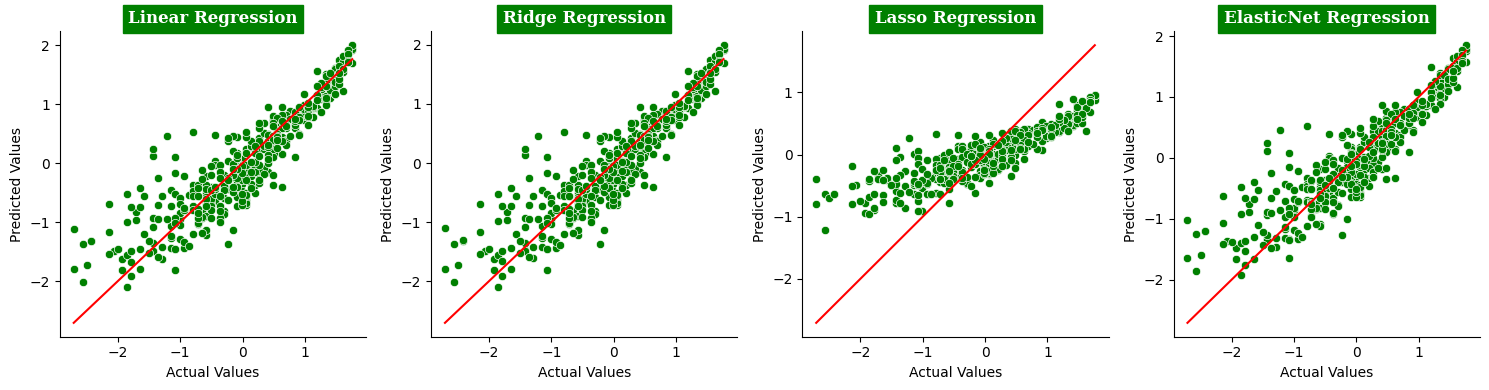

In [347]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)),
                    y_pred_train_lasso.reshape((-1,)),y_pred_train_en.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']
plt.figure(figsize=(15,4))
i=1
for preds in predicted_values:
    plt.subplot(1,4,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

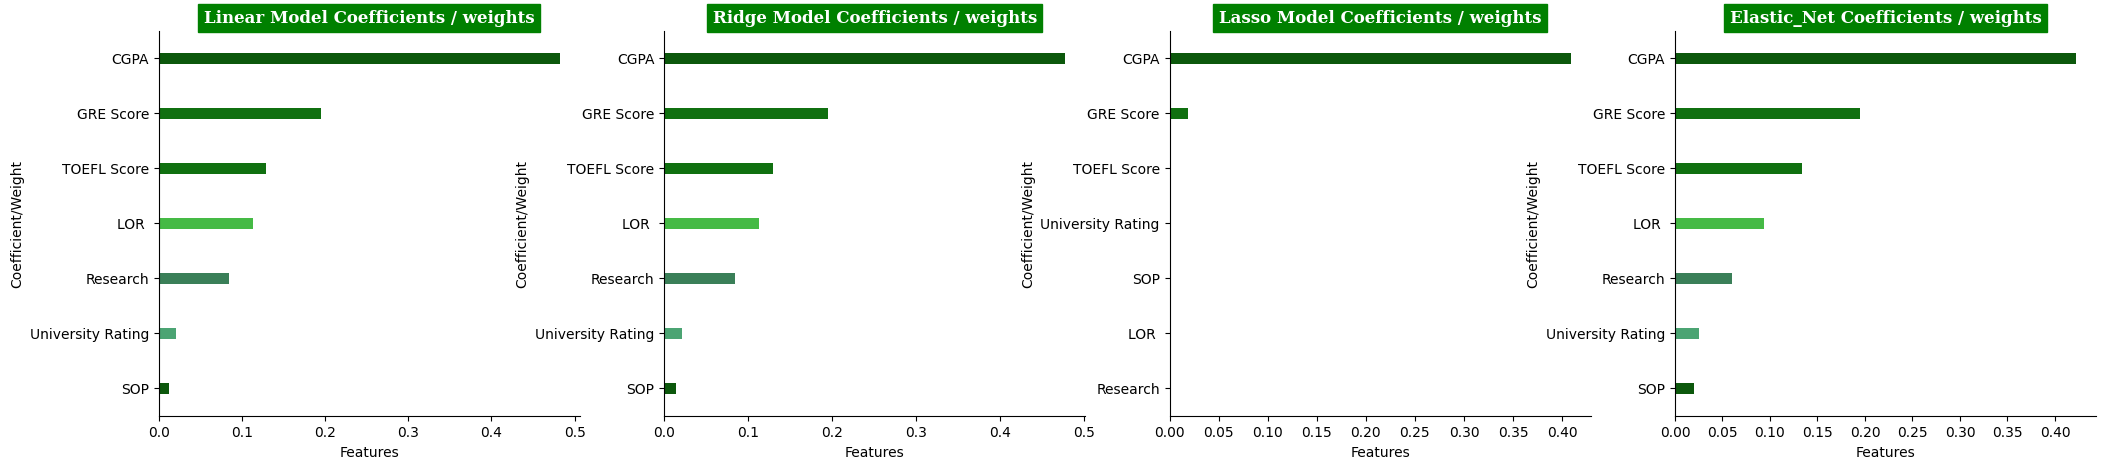

In [348]:
model_major_weights = {"Linear Model":lr_model_weights,
                       "Ridge Model":ridge_model_weights,
                       "Lasso Model":lasso_model_weights,
                       "Elastic_Net":en_model_weights}
# excluding w0-intercept
plt.figure(figsize=(25,5))
i=1
for model,data in model_major_weights.items():
    model_weights_data = data.melt()

    plt.subplot(1,4,i)
    sns.barplot(data=model_weights_data[:-1].sort_values(by='value',ascending=False),
                y='variable', x='value',width=0.2,palette=['darkgreen','g','green','limegreen','seagreen','mediumseagreen'])
    plt.xlabel('Features')
    plt.ylabel('Coefficient/Weight')
    plt.title(f'{model} Coefficients / weights',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
sns.despine()
plt.show()

## **Regression Analysis Summary:**

* Upon conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.

* Additionally, GRE and TOEFL scores also exhibit significant importance in the predictive model.

* Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below 5, indicative of low multicollinearity among predictors.

* Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution. Furthermore, the residual plots indicate some level of heteroscedasticity.

* Subsequent exploration involving regularized models such as Ridge and Lasso regression showcased comparable results to the Linear Regression Model.

* Moreover, employing ElasticNet (L1+L2) regression yielded results consistent with the other regression models, further reinforcing the predictive capabilities of the features under consideration.

##  **Business Insights & Recommendations**

### <span style="color:seagreen"><strong>Insights:</strong></span>

- First column was observed as unique row identifier which was dropped and was not required for model building.
  
- University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.
  
- All the other features are numeric, ordinal and continuous.
  
- No null values were present in data.
  
- No Significant amount of outliers were found in data.sChance of admission(target variable) and GRE score(an independent feature) are nearly normally distribted.
  
- Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Target/Dependent Variable : Chance of Admit (the value we want to predict)
  
- From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.
  
- University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.
  
- Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).
  
- Range of GRE score looks like between 290 to 340.
  
- Range of TOEFL score is between 92 to 120.
  
- University rating , SOP and LOR are distributed between range of 1 to 5.
  
- CGPA range is between 6.8 to 9.92.
  
- From boxplots (distribution of chance of admition (probability of getting admition) as per GRE score ) : with higher GRE score , there is high probability of getting an admission.
  
- Students having high toefl score , has higher probability of getting admission.
  
- From count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission.
  
- We can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission.
  
- Student having research has higher chances of Admission , but also we can observe some outliers within that category.

**Model Predictors:**

Our analysis identified several key predictors strongly correlated with admission chances. Notably, **GRE score, TOEFL score,** and **CGPA** emerged as significant factors influencing admission probabilities.

**Multicollinearity Check:**

Assessing multicollinearity revealed no significant issues, indicating the robustness of our model despite high correlations among predictors.

**Model Performance:**

Both Linear Regression and Ridge Regression models exhibited promising performance, capturing up to approximentally 82% of the variance in admission probabilities.

**Data Distribution:**

Exploratory data analysis uncovered left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.


### **Recommendations:**

**Feature Enhancement:**

Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors significantly influence admission chances.

**Data Augmentation:**

Collect a wider range of data beyond academic metrics to capture applicants' holistic profiles, including extracurricular achievements, personal statements, and diversity factors.


**Additional Features:**

Given the strong correlation among CGPA, we can enrich the predictive model with additional diverse features such as Research, work experience, internships, or extracurricular activities.

By implementing these recommendations, we can further enhance our admissions process, providing valuable insights and support to both applicants and educational institutions.